<a href="https://colab.research.google.com/github/fxmike/data-science-bootcamp/blob/main/07_uczenie_glebokie/03_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

'2.5.0'

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [8]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

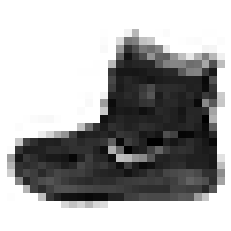

In [9]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

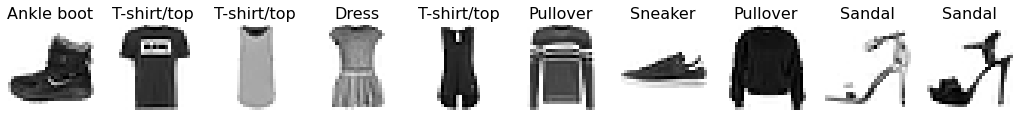

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18,13))

for i in range(1,11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(class_names[y_train[i-1]], color='black', fontsize=16)

plt.show()

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

budowa modelu

In [17]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5245 - accuracy: 0.8139 - val_loss: 0.3997 - val_accuracy: 0.8577
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3880 - accuracy: 0.8604 - val_loss: 0.3757 - val_accuracy: 0.8670
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3539 - accuracy: 0.8726 - val_loss: 0.3681 - val_accuracy: 0.8702
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3312 - accuracy: 0.8824 - val_loss: 0.3653 - val_accuracy: 0.8752
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3162 - accuracy: 0.8877 - val_loss: 0.3720 - val_accuracy: 0.8802
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3067 - accuracy: 0.8921 - val_loss: 0.3720 - val_accuracy: 0.8806
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2961 - accuracy: 0.8967 - val_loss: 0.3728 - val_accuracy:

In [19]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.524504,0.813875,0.399677,0.857667,0
1,0.387964,0.860354,0.375682,0.867000,1
2,0.353910,0.872563,0.368054,0.870250,2
3,0.331167,0.882354,0.365251,0.875167,3
4,0.316208,0.887688,0.371975,0.880250,4
5,0.306653,0.892062,0.371995,0.880583,5
6,0.296112,0.896750,0.372752,0.881167,6
7,0.287694,0.899958,0.415773,0.873333,7
8,0.280453,0.901271,0.387059,0.880667,8
9,0.274668,0.906292,0.396247,0.880500,9


ocena modelu

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and loss')
fig.show()

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8708000183105469


predykcja na podstawie modelu

In [23]:
predictions = model.predict(X_test)
predictions

array([[0.000000123675, 0.            , 0.000000002248, ..., 0.0017652498  , 0.000006349801, 0.9965153     ],
       [0.000019823814, 0.            , 0.9998989     , ..., 0.            , 0.            , 0.            ],
       [0.000000000115, 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.00000775573 , 0.            , 0.000000068017, ..., 0.            , 0.999992      , 0.            ],
       [0.000000000001, 0.99999785    , 0.            , ..., 0.000000000243, 0.            , 0.00000000008 ],
       [0.000000239466, 0.000000000007, 0.00000080075 , ..., 0.0067751445  , 0.00018351644 , 0.000012062667]], dtype=float32)

In [24]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001712,0.000001,0.001765,0.000006,0.996515
1,0.000020,0.000000,0.999899,0.000000,0.000002,0.000000,0.000079,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.396686,0.000000,0.000906,0.000023,0.000010,0.000000,0.602366,0.000000,0.000008,0.000000


In [26]:
predictions_cls = model.predict_classes(X_test)
predictions_cls

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



array([9, 2, 1, ..., 8, 1, 5])

eksloracja predykcji

In [28]:
#@title Wybierz indeks zdjęcia:
idx = 1858 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v', 
                     marker_color=color))
fig.update_layout(width=600, height=300,
                  title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

błędnie sklasyfikowane obrazy

In [30]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 614 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, 
                     y=predictions_df.iloc[index_mapper[idx]], 
                     orientation='v', 
                     marker_color='red'))

fig.update_layout(width=600, height=300,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

możliwości poprawy modeli

In [31]:
#zwiększenie liczby epok
#zwiększenie/zmniejszenie parametrów uczenia, strojenie hiperparametrów
#zwiększenie/zmniejszenie liczby neuronów wewnąrz warstw ukrytych
#zwiększenie/zmniejszenie parametru batch_size czyli rozmiaru wsadu
#zwiększenie/zmniejszenie liczby warstw ukrytych
#zastosowanie regularyzacji (L1-Lasso, L2-ridge), warstwy Dropout